In [248]:
#Importing important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [249]:
#Impoting Dataset

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
test_results = pd.read_csv('gender_submission.csv')
combine = [df_train, df_test]

In [250]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [251]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [252]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


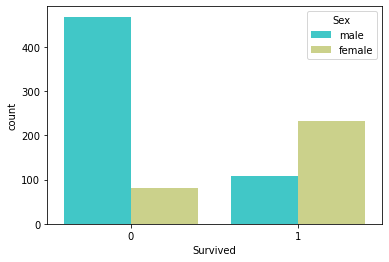

In [253]:
#Survival graph for male and female

sns.countplot(x='Survived',hue='Sex',data=df_train,palette='rainbow')

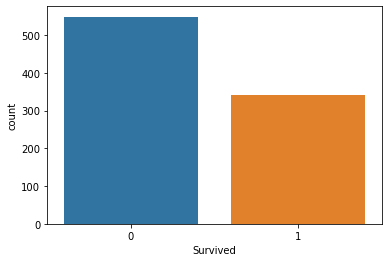

In [254]:
#Total Survival

sns.countplot(df_train['Survived'])

In [255]:
#Clean data
#Drop Fare, Cabin,and Ticket because it dosen't server any purpose

#Train data
df_train = df_train.drop(['Fare'],axis=1)
df_train = df_train.drop(['Cabin'],axis=1)
df_train = df_train.drop(['Ticket'],axis=1)

#Train data
df_test = df_test.drop(['Fare'],axis=1)
df_test = df_test.drop(['Cabin'],axis=1)
df_test = df_test.drop(['Ticket'],axis=1)

In [256]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S


In [257]:
#Map out Male as 0 and female as 1

sex = {"male":0,"female":1}
df_train['Sex'] = df_train['Sex'].map(sex)
df_test['Sex'] = df_test['Sex'].map(sex)

In [258]:
#Filling the null fields with the most common data

df_train['Embarked'] = df_train['Embarked'].fillna("S")
df_test['Embarked'] = df_test['Embarked'].fillna("S")

In [259]:
#Map out Embarked also

EmbarkedMap = {"S": 1, "C": 2, "Q": 3}
df_train['Embarked'] = df_train['Embarked'].map(EmbarkedMap)
df_test['Embarked'] = df_test['Embarked'].map(EmbarkedMap)

In [260]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,1


In [261]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,3
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,1


In [262]:
#Filling the null field of age with the mean.

df_train['Age'].fillna((round(int(df_train['Age'].mean()))),inplace=True)
df_test['Age'].fillna((round(int(df_test['Age'].mean()))),inplace=True)

In [263]:
#Extracting the title from names

df_train['Title'] = df_train['Name'].str.extract("([A-Za-z]+)\.",expand=False)       
df_test['Title'] = df_test['Name'].str.extract("([A-Za-z]+)\.",expand=False)

In [266]:
df_test.head(15)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,Title
0,892,3,"Kelly, Mr. James",0,34.5,0,0,3,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,1,Mrs
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,3,Mr
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,1,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,1,Mrs
5,897,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,1,Mr
6,898,3,"Connolly, Miss. Kate",1,30.0,0,0,3,Miss
7,899,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,1,Mr
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,0,0,2,Mrs
9,901,3,"Davies, Mr. John Samuel",0,21.0,2,0,1,Mr


In [267]:
df_test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [268]:
#Fixing the types

df_train['Title'] = df_train['Title'].replace(['Don', 'Rev', 'Dr',
                                               'Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess','Jonkheer'],'Rare')
df_train['Title'] = df_train['Title'].replace('Mme','Mrs')
df_train['Title'] = df_train['Title'].replace('Ms','Miss')
df_train['Title'] = df_train['Title'].replace('Mlle','Mrs')

#Fixing the types

df_test['Title'] = df_test['Title'].replace(['Dona','Don', 'Rev', 'Dr',
                                               'Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess','Jonkheer'],'Rare')
df_test['Title'] = df_test['Title'].replace('Mme','Mrs')
df_test['Title'] = df_test['Title'].replace('Ms','Miss')
df_test['Title'] = df_test['Title'].replace('Mlle','Mrs')

In [269]:
df_train[["Title", "Survived"]].groupby("Title", as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.699454
2,Mr,0.156673
3,Mrs,0.796875
4,Rare,0.347826


In [270]:
#Finding out that is the Person alone or with family

df_train['IsAlone'] = df_train['SibSp'] + df_train['Parch'] + 1
df_train['IsAlone'].loc[df_train['IsAlone'] > 1] = 0
df_train['IsAlone'].loc[df_train['IsAlone'] == 1] = 1

C:\Users\Priyank\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [271]:
df_test['IsAlone'] = df_test['SibSp'] + df_test['Parch'] + 1
df_test['IsAlone'].loc[df_test['IsAlone'] > 1] = 0
df_test['IsAlone'].loc[df_test['IsAlone'] == 1] = 1

In [272]:
#Making individual columns for the title

df_train = pd.get_dummies(df_train,columns = ['Title'])
df_test = pd.get_dummies(df_test,columns = ['Title'])

In [273]:
#Droping name as it is of no use now.

df_train = df_train.drop(['Name'],axis=1)
df_test = df_test.drop(['Name'],axis=1)

In [274]:
#Spliting data for the model

X = df_train.drop('Survived',axis=1)
y = df_train['Survived']

In [275]:
#Train and Test split

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y , test_size=0.2, random_state=42)

In [355]:
#Using RandomForestClassifier to predict the results

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 105, criterion = 'entropy', random_state = 0)

In [356]:
rf.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=105, random_state=0)

In [357]:
Predictions = rf.predict(X_test)

In [358]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [359]:
#To see how much is correctly Predicted

cn = confusion_matrix(Predictions,Y_test)

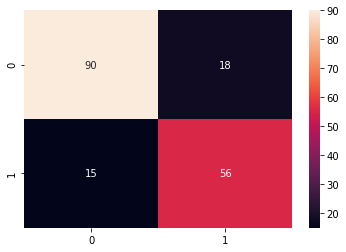

In [360]:
sns.heatmap(cn,annot=True)

#Correct : 90+56 = 146
#Incorrect : 15+18 = 33

In [361]:
print(classification_report(Y_test,Predictions))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



In [362]:
acc = accuracy_score(Y_test,Predictions)

In [363]:
#Total accuracy 

print("Accuracy is :",round(acc*100))

Accuracy is : 82.0


In [336]:
Test_predictions = rf.predict(df_test)

In [286]:
cn = confusion_matrix(test_results['Survived'],Test_predictions)

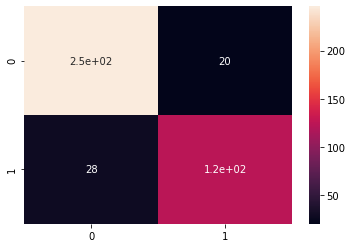

In [287]:
sns.heatmap(cn,annot=True)